In [244]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from pandas import DataFrame
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline


In [224]:
data= pd.read_csv('/home/ankit/Documents/sangeet/house_prices.csv')

In [225]:
data


,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000
5,14115,143000
6,10084,307000
7,10382,200000
8,6120,129900
9,7420,118000


In [288]:
co= data.corr()
co

,LotArea,SalePrice
LotArea,1.000000,0.390102
SalePrice,0.390102,1.000000


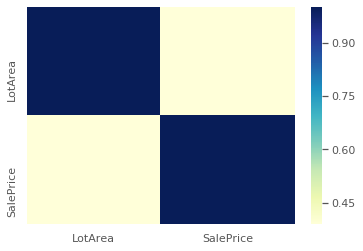

In [299]:
sns.heatmap(co,cmap="YlGnBu")

Text(0, 0.5, 'Price')

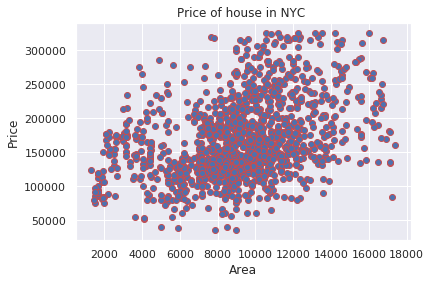

In [112]:
plt.scatter(data['LotArea'],data['SalePrice'],edgecolors='r')
plt.title('Price of house in NYC ')
plt.xlabel('Area')
plt.ylabel('Price')


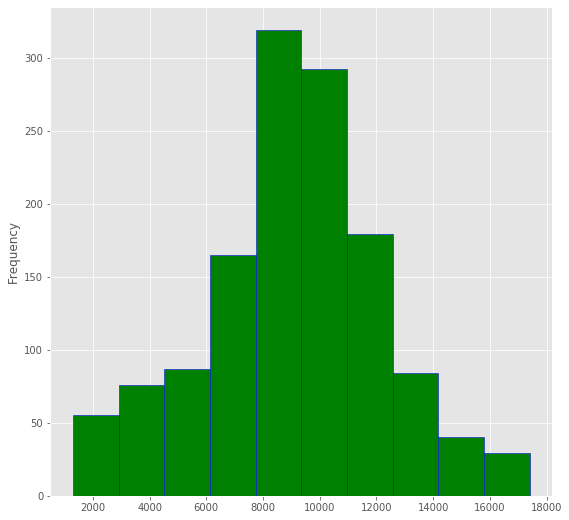

In [15]:
data.LotArea.plot(kind= 'hist', color= 'green',edgecolor= 'b', 
            figsize=(9,9))

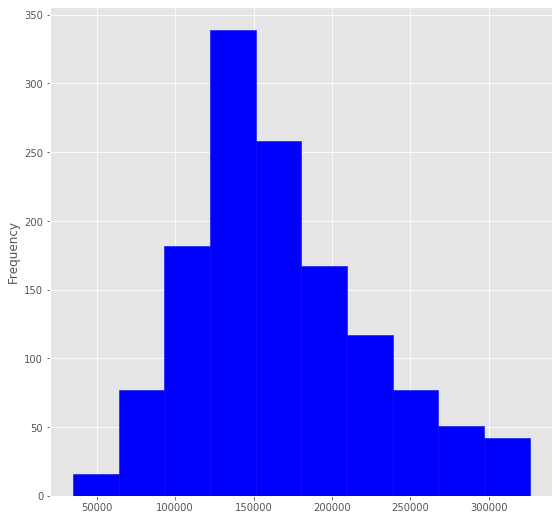

In [92]:
data.SalePrice.plot(kind= 'hist', color= 'b',edgecolor= 'b', 
            figsize=(9,9))

AxesSubplot(0.125,0.125;0.775x0.755)


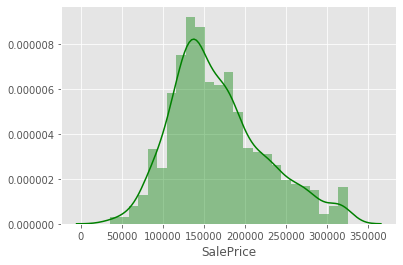

In [89]:
print(sns.distplot(data['SalePrice'], bins=25, color = 'green'))


AxesSubplot(0.125,0.125;0.775x0.755)


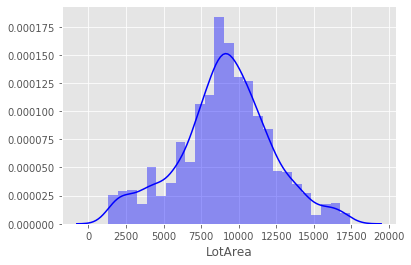

In [91]:
print(sns.distplot(data['LotArea'], bins=25, color = 'b'))


In [34]:
print(data.describe())
print('*'*20)


            LotArea      SalePrice
count   1326.000000    1326.000000
mean    9076.268477  167433.042232
std     3119.870831   57192.320151
min     1300.000000   34900.000000
25%     7253.750000  128000.000000
50%     9127.500000  157000.000000
75%    10963.500000  200000.000000
max    17400.000000  326000.000000
********************


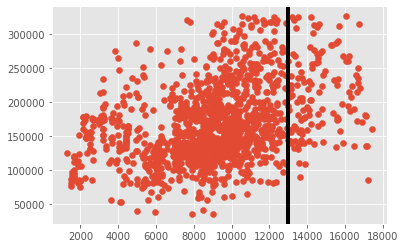

In [40]:
plt.scatter(data['LotArea'], data['SalePrice'])
plt.axvline(x=13000,linewidth= '4',color= 'black')

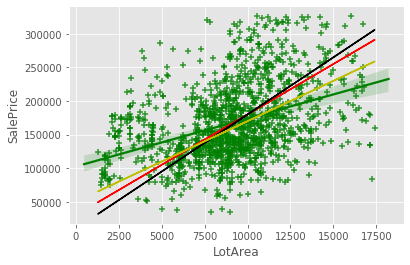

In [64]:

ax = sns.regplot(x= data.LotArea, y= data.SalePrice, marker="+",color= 'g',ci=100,x_jitter=.1)
plt.plot(data.LotArea, 30000 + 15*data.LotArea, "r-")

plt.plot(data.LotArea, 10000 + 17*data.LotArea, "k-")
plt.plot(data.LotArea, 50000 + 12*data.LotArea, "y-")

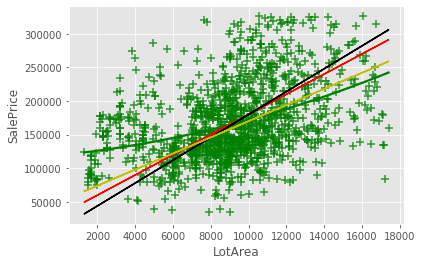

In [79]:
ax = sns.regplot(x= data.LotArea, y= data.SalePrice, marker="+",color= 'g',x_jitter=.1,scatter_kws={"s": 80},order=2, ci=None, truncate=True)
plt.plot(data.LotArea, 30000 + 15*data.LotArea, "r-")

plt.plot(data.LotArea, 10000 + 17*data.LotArea, "k-")
plt.plot(data.LotArea, 50000 + 12*data.LotArea, "y-")

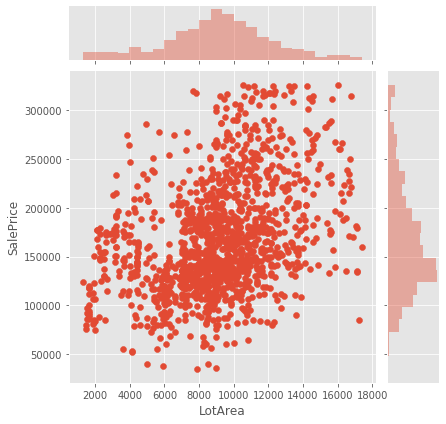

In [95]:
sns.jointplot(x=data.LotArea, y=data.SalePrice,data = data)

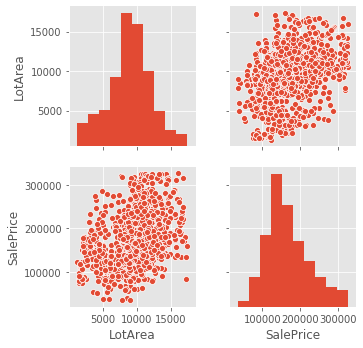

In [96]:
sns.pairplot(data)

### Create a linear model plot (using seaborn's lmplot) of Lot area vs Sales.

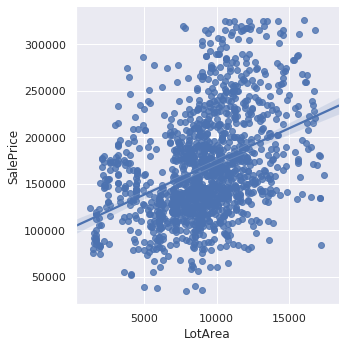

In [99]:
sns.set(color_codes= True)
sns.lmplot(x= 'LotArea', y= 'SalePrice',data= data)

### Training and Testing Data¶
Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets. Set a variable X equal to the numerical features of the customers and a variable y equal to the "lot area" column.

### Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101

In [101]:
from sklearn.model_selection import train_test_split

### Training the Model
Now its time to train our model on our training data!


In [231]:
x= data[['LotArea']]
print(x)


      LotArea
0        8450
1        9600
2       11250
3        9550
4       14260
...       ...
1321     7917
1322    13175
1323     9042
1324     9717
1325     9937

[1326 rows x 1 columns]


In [232]:
y= data[['SalePrice']]
print(y)

      SalePrice
0        208500
1        181500
2        223500
3        140000
4        250000
...         ...
1321     175000
1322     210000
1323     266500
1324     142125
1325     147500

[1326 rows x 1 columns]


In [255]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)


In [256]:
lm = LinearRegression()


In [257]:
lm.fit(X_train, y_train )


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [258]:
print(lm.coef_)


[[6.6132829]]


In [260]:
predictions = lm.predict(X_test)
predictions

array([[180804.68723743],
       [169376.93438687],
       [146296.57706715],
       [130656.16300952],
       [154523.50099429],
       [117727.19494074],
       [191412.39300845],
       [141706.95873481],
       [155879.22398872],
       [176056.3501155 ],
       [157413.50562143],
       [144444.85785525],
       [117727.19494074],
       [186280.48547833],
       [178040.33498539],
       [188145.43125603],
       [158200.48628649],
       [209797.31946942],
       [168232.83644523],
       [180579.83561885],
       [157955.7948192 ],
       [135966.62917792],
       [139683.29416752],
       [146296.57706715],
       [168781.7389259 ],
       [135887.26978313],
       [173675.56827163],
       [156613.29839058],
       [130662.77629242],
       [174118.65822591],
       [135887.26978313],
       [173305.22442925],
       [120617.19956788],
       [162168.45602627],
       [195724.25345901],
       [171162.52076977],
       [166248.85157534],
       [158167.41987199],
       [1524

In [250]:
x_test


array([[ 12384],
       [  2001],
       [233170],
       [325000],
       [ 10690],
       [ 11250],
       [  8248],
       [ 11096],
       [119500],
       [  9130],
       [121600],
       [  7420],
       [ 13695],
       [219210],
       [ 10355],
       [ 16381],
       [ 10000],
       [ 16692],
       [  9337],
       [127500],
       [  8000],
       [196000],
       [ 10192],
       [180000],
       [250000],
       [ 10800],
       [  7128],
       [  9084],
       [ 11911],
       [167000],
       [  9600],
       [ 14963],
       [  7700],
       [126000],
       [290000],
       [179000],
       [207500],
       [  6600],
       [139000],
       [122000],
       [170000],
       [185000],
       [ 13811],
       [155000],
       [  7200],
       [196500],
       [107000],
       [ 14115],
       [185900],
       [  9200],
       [134900],
       [151000],
       [113000],
       [ 14684],
       [250000],
       [154000],
       [274000],
       [  6993],
       [153500

Text(0.5, 0, 'Y test')

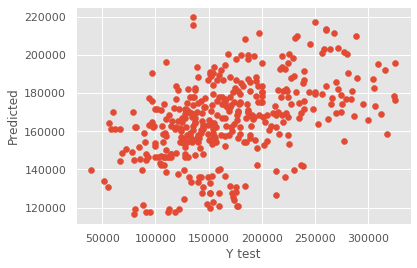

In [261]:
plt.scatter(y_test, predictions)
plt.ylabel('Predicted')
plt.xlabel('Y test')

### Evaluating the Model
Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

    Calculate the Mean Absolute Error,
     Mean Squared Error, and
     the Root Mean Squared Error.

In [262]:
import sklearn.metrics as metrics

In [263]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predictions)))

MAE: 41197.71954587955


In [264]:
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predictions)))

MSE: 2672220271.581033


In [265]:
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

RMSE: 51693.52253020714


### Residuals¶
You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data.

Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().

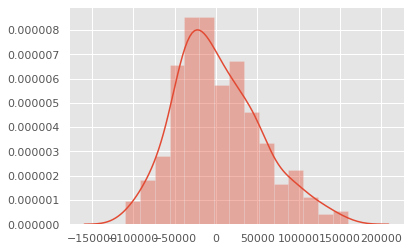

In [297]:
sns.distplot((y_test-predictions))

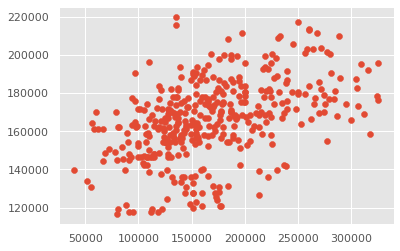

In [298]:
plt.scatter(y_test,predictions)


In [280]:
pd.DataFrame(lm.coef_ , x.columns, columns=['Coeffecient'])

,Coeffecient
LotArea,6.613283


In [301]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.19703892353647712

In [303]:
y_error = y_test - predictions
y_error

,SalePrice
1101,8195.312763
446,-36376.934387
501,-33796.577067
1286,45243.836990
497,-25023.500994
210,-5727.194941
45,48273.606992
161,97293.041265
20,-16479.223989
209,-79056.350115
